# General Imports

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

In [3]:
from utils.display_images import denormalize_img
from utils import show_dataset_image, show_dataset_mask
from utils import show_prediction_images, show_prediction_uncertainty_images

In [4]:
import pacmap
from sklearn.decomposition import PCA

In [5]:
from ls_ood_detect.uncertainty_estimation import Hook
from ls_ood_detect.uncertainty_estimation import deeplabv3p_get_ls_mcd_samples
from ls_ood_detect.uncertainty_estimation import get_latent_represent_mcd_samples
from ls_ood_detect.uncertainty_estimation import get_dl_h_z
from ls_ood_detect.ood_detection_dataset import build_ood_detection_ds
from ls_ood_detect.dimensionality_reduction import plot_samples_pacmap
from ls_ood_detect.detectors import KDEClassifier, DetectorKDE
from ls_ood_detect.score import get_hz_scores
from ls_ood_detect.metrics import get_hz_detector_results
from ls_ood_detect.metrics import get_ood_detector_results
from ls_ood_detect.metrics import plot_roc_ood_detector
from ls_ood_detect.metrics import plot_auprc_ood_detector
from ls_ood_detect.dimensionality_reduction import plot_samples_pacmap
from ls_ood_detect.dimensionality_reduction import apply_pca_ds_split
from ls_ood_detect.dimensionality_reduction import apply_pca_transform

In [6]:
from icecream import ic

# Load Entropy

In [7]:
cs_unet_h_z_cs_normal_train_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_cs_normal_train_samples_np.npy')
cs_unet_h_z_cs_normal_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_cs_normal_valid_samples_np.npy')
cs_unet_h_z_cs_normal_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_cs_normal_test_samples_np.npy')

cs_unet_h_z_cs_anomal_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_cs_anomal_valid_samples_np.npy')
cs_unet_h_z_cs_anomal_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_cs_anomal_test_samples_np.npy')

cs_unet_h_z_ws_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_ws_valid_samples_np.npy')
cs_unet_h_z_ws_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_ws_test_samples_np.npy')

cs_unet_h_z_ws_soil_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_ws_soil_valid_samples_np.npy')
cs_unet_h_z_ws_soil_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_ws_soil_test_samples_np.npy')

# Plot 2D Projections

ic| cs_unet_h_z_ind.shape: (2025, 256)


ic| cs_unet_h_z_ood.shape: (2025, 256)


(4050, 256)
(4050, 1)
(4050, 2)


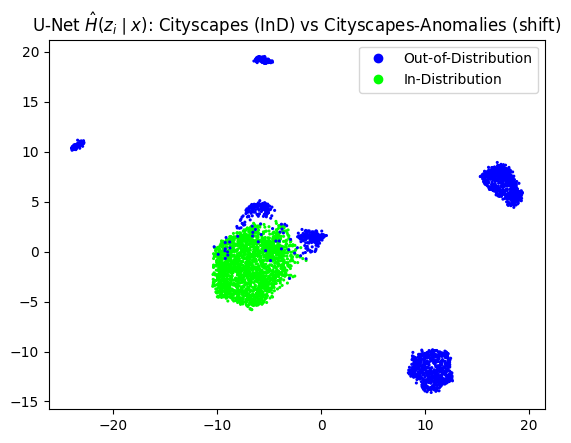

In [17]:
cs_unet_h_z_ind = np.concatenate((cs_unet_h_z_cs_normal_valid_samples_np,
                                  cs_unet_h_z_cs_normal_test_samples_np))

cs_unet_h_z_ood = np.concatenate((cs_unet_h_z_cs_anomal_valid_samples_np,
                                  cs_unet_h_z_cs_anomal_test_samples_np))

ic(cs_unet_h_z_ind.shape)
ic(cs_unet_h_z_ood.shape)

plot_samples_pacmap(cs_unet_h_z_ind,
                    cs_unet_h_z_ood,
                    neighbors=12,
                    title="U-Net $\hat{H}(z_i \mid x)$: Cityscapes (InD) vs Cityscapes-Anomalies (shift)")

ic| cs_unet_h_z_ind.shape: (2025, 256)
ic| cs_unet_h_z_ood.shape: (2305, 256)

(4330, 256)
(4330, 1)
(4330, 2)


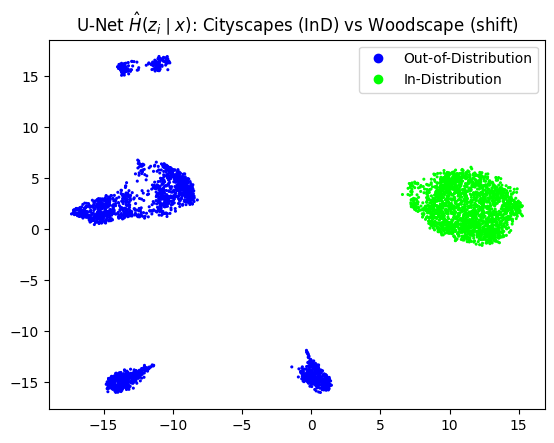

In [18]:
cs_unet_h_z_ind = np.concatenate((cs_unet_h_z_cs_normal_valid_samples_np,
                                  cs_unet_h_z_cs_normal_test_samples_np))

cs_unet_h_z_ood = np.concatenate((cs_unet_h_z_ws_valid_samples_np,
                                  cs_unet_h_z_ws_test_samples_np))

ic(cs_unet_h_z_ind.shape)
ic(cs_unet_h_z_ood.shape)

plot_samples_pacmap(cs_unet_h_z_ind,
                    cs_unet_h_z_ood,
                    neighbors=12,
                    title="U-Net $\hat{H}(z_i \mid x)$: Cityscapes (InD) vs Woodscape (shift)")

ic| cs_unet_h_z_ind.shape: (2025, 256)


ic| cs_unet_h_z_ood.shape: (1800, 256)


(3825, 256)
(3825, 1)
(3825, 2)


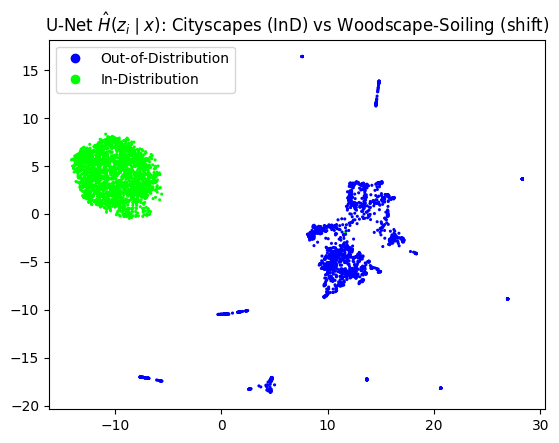

In [19]:
cs_unet_h_z_ind = np.concatenate((cs_unet_h_z_cs_normal_valid_samples_np,
                                  cs_unet_h_z_cs_normal_test_samples_np))

cs_unet_h_z_ood = np.concatenate((cs_unet_h_z_ws_soil_valid_samples_np,
                                  cs_unet_h_z_ws_soil_test_samples_np))

ic(cs_unet_h_z_ind.shape)
ic(cs_unet_h_z_ood.shape)

plot_samples_pacmap(cs_unet_h_z_ind,
                    cs_unet_h_z_ood,
                    neighbors=12,
                    title="U-Net $\hat{H}(z_i \mid x)$: Cityscapes (InD) vs Woodscape-Soiling (shift)")

# Load Entropy

In [10]:
cs_unet_h_z_cs_normal_train_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_cs_normal_train_samples_np.npy')
cs_unet_h_z_cs_normal_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_cs_normal_valid_samples_np.npy')
cs_unet_h_z_cs_normal_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_cs_normal_test_samples_np.npy')

cs_unet_h_z_cs_anomal_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_cs_anomal_valid_samples_np.npy')
cs_unet_h_z_cs_anomal_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_cs_anomal_test_samples_np.npy')


cs_unet_h_z_ws_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_ws_valid_samples_np.npy')
cs_unet_h_z_ws_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_ws_test_samples_np.npy')

cs_unet_h_z_ws_soil_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_ws_soil_valid_samples_np.npy')
cs_unet_h_z_ws_soil_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/cityscapes/entropy/cs_unet_h_z_ws_soil_test_samples_np.npy')

# Dimensionality Reduction PCA

In [25]:
pca_cs_unet_h_z_cs_normal_train_samples_np, pca_tr = apply_pca_ds_split(samples=cs_unet_h_z_cs_normal_train_samples_np,                                                                          
                                                                          nro_components=50)

In [26]:
pca_cs_unet_h_z_cs_normal_valid_samples_np = apply_pca_transform(cs_unet_h_z_cs_normal_valid_samples_np, pca_tr) # InD
pca_cs_unet_h_z_cs_normal_test_samples_np = apply_pca_transform(cs_unet_h_z_cs_normal_test_samples_np, pca_tr) # InD

pca_cs_unet_h_z_cs_anomal_valid_samples_np = apply_pca_transform(cs_unet_h_z_cs_anomal_valid_samples_np, pca_tr) # OoD | shifted
pca_cs_unet_h_z_cs_anomal_test_samples_np = apply_pca_transform(cs_unet_h_z_cs_anomal_test_samples_np, pca_tr) # OoD | shifted

pca_cs_unet_h_z_ws_valid_samples_np = apply_pca_transform(cs_unet_h_z_ws_valid_samples_np, pca_tr) # OoD | shifted
pca_cs_unet_h_z_ws_test_samples_np = apply_pca_transform(cs_unet_h_z_ws_test_samples_np, pca_tr) # OoD | shifted

pca_cs_unet_h_z_ws_soil_valid_samples_np = apply_pca_transform(cs_unet_h_z_ws_soil_valid_samples_np, pca_tr) # OoD | shifted
pca_cs_unet_h_z_ws_soil_test_samples_np = apply_pca_transform(cs_unet_h_z_ws_soil_test_samples_np, pca_tr) # OoD | shifted

# Experiment 2: PCA Dataset - Train Data Reference

In [27]:
ic(pca_cs_unet_h_z_cs_normal_train_samples_np.shape);
ic(pca_cs_unet_h_z_cs_normal_valid_samples_np.shape);
ic(pca_cs_unet_h_z_cs_normal_test_samples_np.shape);

ic(pca_cs_unet_h_z_cs_anomal_valid_samples_np.shape);
ic(pca_cs_unet_h_z_cs_anomal_test_samples_np.shape);

ic(pca_cs_unet_h_z_ws_valid_samples_np.shape);
ic(pca_cs_unet_h_z_ws_test_samples_np.shape);

ic(pca_cs_unet_h_z_ws_soil_valid_samples_np.shape);
ic(pca_cs_unet_h_z_ws_soil_test_samples_np.shape);

ic| pca_cs_unet_h_z_cs_normal_train_samples_np.shape: (2975, 50)
ic| pca_cs_unet_h_z_cs_normal_valid_samples_np.shape: (500, 50)


ic| pca_cs_unet_h_z_cs_normal_test_samples_np.shape: (1525, 50)
ic| pca_cs_unet_h_z_cs_anomal_valid_samples_np.shape: (500, 50)
ic| pca_cs_unet_h_z_cs_anomal_test_samples_np.shape: (1525, 50)
ic| pca_cs_unet_h_z_ws_valid_samples_np.shape: (1482, 50)
ic| pca_cs_unet_h_z_ws_test_samples_np.shape: (823, 50)
ic| pca_cs_unet_h_z_ws_soil_valid_samples_np.shape: (800, 50)
ic| pca_cs_unet_h_z_ws_soil_test_samples_np.shape: (1000, 50)


In [28]:
pca_cs_unet_ind_cs_normal_h_z = np.concatenate((pca_cs_unet_h_z_cs_normal_valid_samples_np,
                                                pca_cs_unet_h_z_cs_normal_test_samples_np))

pca_cs_unet_ood_cs_anomal_h_z = np.concatenate((pca_cs_unet_h_z_cs_anomal_valid_samples_np,
                                                pca_cs_unet_h_z_cs_anomal_test_samples_np))

pca_cs_unet_ood_ws_h_z = np.concatenate((pca_cs_unet_h_z_ws_valid_samples_np,
                                         pca_cs_unet_h_z_ws_test_samples_np))

pca_cs_unet_ood_ws_soil_h_z = np.concatenate((pca_cs_unet_h_z_ws_soil_valid_samples_np,
                                              pca_cs_unet_h_z_ws_soil_test_samples_np))

ic(pca_cs_unet_ind_cs_normal_h_z.shape);
ic(pca_cs_unet_ood_cs_anomal_h_z.shape);
ic(pca_cs_unet_ood_ws_h_z.shape);
ic(pca_cs_unet_ood_ws_soil_h_z.shape);

ic| pca_cs_unet_ind_cs_normal_h_z.shape: (2025, 50)
ic| pca_cs_unet_ood_cs_anomal_h_z.shape: (2025, 50)
ic| pca_cs_unet_ood_ws_h_z.shape: (2305, 50)
ic| pca_cs_unet_ood_ws_soil_h_z.shape: (1800, 50)


## Build Detector

In [29]:
cs_unet_ds_shift_detector_pca = DetectorKDE(train_embeddings=pca_cs_unet_h_z_cs_normal_train_samples_np)

## Get Scores

In [30]:
scores_pca_cs_unet_ind_cs_normal_h_z = get_hz_scores(cs_unet_ds_shift_detector_pca,
                                                       pca_cs_unet_ind_cs_normal_h_z)

scores_pca_cs_unet_ood_cs_anomal_h_z = get_hz_scores(cs_unet_ds_shift_detector_pca,
                                                       pca_cs_unet_ood_cs_anomal_h_z)

scores_pca_cs_unet_ood_ws_h_z = get_hz_scores(cs_unet_ds_shift_detector_pca,
                                                pca_cs_unet_ood_ws_h_z)

scores_pca_cs_unet_ood_ws_soil_h_z = get_hz_scores(cs_unet_ds_shift_detector_pca,
                                                     pca_cs_unet_ood_ws_soil_h_z)

## Get Results

In [31]:
print("\ncitycapes-normal vs. citycapes-anomal:")
print("Test InD shape", scores_pca_cs_unet_ind_cs_normal_h_z.shape);
print("Test OoD shape", scores_pca_cs_unet_ood_cs_anomal_h_z.shape);

results_ws_anomal = get_hz_detector_results(detect_exp_name="citycapes-normal vs. citycapes-anomal",
                                            ind_samples_scores=scores_pca_cs_unet_ind_cs_normal_h_z,
                                            ood_samples_scores=scores_pca_cs_unet_ood_cs_anomal_h_z)

print("\ncityscapes-normal vs. woodscape:")
print("Test InD shape", scores_pca_cs_unet_ind_cs_normal_h_z.shape);
print("Test OoD shape", scores_pca_cs_unet_ood_ws_h_z.shape);

results_cs = get_hz_detector_results(detect_exp_name="cityscapes-normal vs. woodscape",
                                     ind_samples_scores=scores_pca_cs_unet_ind_cs_normal_h_z,
                                     ood_samples_scores=scores_pca_cs_unet_ood_ws_h_z)

print("\ncityscapes-normal vs. woodscape-soiling:")
print("Test InD shape", scores_pca_cs_unet_ind_cs_normal_h_z.shape);
print("Test OoD shape", scores_pca_cs_unet_ood_ws_soil_h_z.shape);

results_ws_soil = get_hz_detector_results(detect_exp_name="cityscapes-normal vs. woodscape-soiling",
                                          ind_samples_scores=scores_pca_cs_unet_ind_cs_normal_h_z,
                                          ood_samples_scores=scores_pca_cs_unet_ood_ws_soil_h_z)


citycapes-normal vs. citycapes-anomal:
Test InD shape (2025,)
Test OoD shape (2025,)
AUROC: 0.9088
FPR95: 0.3121
AUPR: 0.8943

cityscapes-normal vs. woodscape:
Test InD shape (2025,)
Test OoD shape (2305,)
AUROC: 0.9710
FPR95: 0.1423
AUPR: 0.9737

cityscapes-normal vs. woodscape-soiling:
Test InD shape (2025,)
Test OoD shape (1800,)
AUROC: 0.9788
FPR95: 0.0794
AUPR: 0.9825


So far the best results with PCA are with: 48, 50 PCA components

```txt
PCA 50:

citycapes-normal vs. citycapes-anomal:
Test InD shape (2025,)
Test OoD shape (2025,)
AUROC: 0.9083
FPR95: 0.3274
AUPR: 0.8931

cityscapes-normal vs. woodscape:
Test InD shape (2025,)
Test OoD shape (2305,)
AUROC: 0.9687
FPR95: 0.1484
AUPR: 0.9707

cityscapes-normal vs. woodscape-soiling:
Test InD shape (2025,)
Test OoD shape (1800,)
AUROC: 0.9789
FPR95: 0.0828
AUPR: 0.9825
```

## Plot Score Values Training Set Reference KDE

In [32]:
df_score_ind_cs_normal = pd.DataFrame(scores_pca_cs_unet_ind_cs_normal_h_z, columns=["LaRED score"])
df_score_ood_cs_anomal = pd.DataFrame(scores_pca_cs_unet_ood_cs_anomal_h_z, columns=["LaRED score"])
df_score_ood_ws = pd.DataFrame(scores_pca_cs_unet_ood_ws_h_z, columns=["LaRED score"])
df_score_ood_ws_soil = pd.DataFrame(scores_pca_cs_unet_ood_ws_soil_h_z, columns=["LaRED score"])

df_score_ind_cs_normal.insert(0, "Dataset", "")
df_score_ind_cs_normal.loc[:, "Dataset"] = "InD-cityscapes-normal"

df_score_ood_cs_anomal.insert(0, "Dataset", "")
df_score_ood_cs_anomal.loc[:, "Dataset"] = "cityscapes-anomalies"

df_score_ood_ws.insert(0, "Dataset", "")
df_score_ood_ws.loc[:, "Dataset"] = "woodscape"

df_score_ood_ws_soil.insert(0, "Dataset", "")
df_score_ood_ws_soil.loc[:, "Dataset"] = "woodscape-soiling"

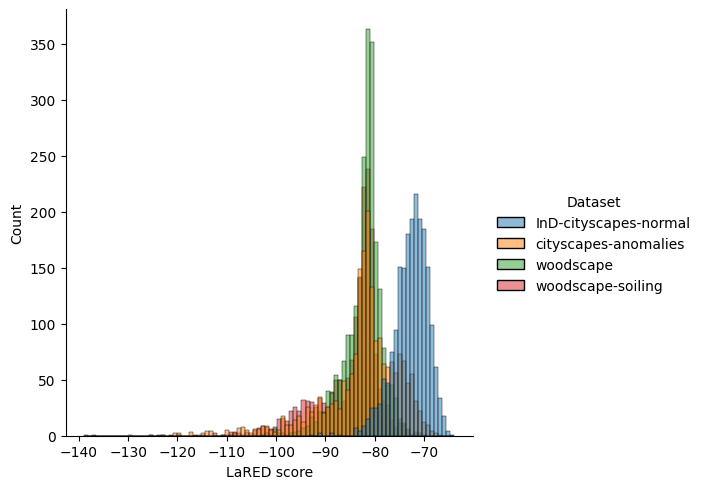

In [33]:
df_h_z_valid_scores = pd.concat([df_score_ind_cs_normal,
                                 df_score_ood_cs_anomal,
                                 df_score_ood_ws,
                                 df_score_ood_ws_soil]).reset_index(drop=True)

sns.displot(df_h_z_valid_scores, x="LaRED score", hue="Dataset", kind="hist", fill=True)
plt.show()

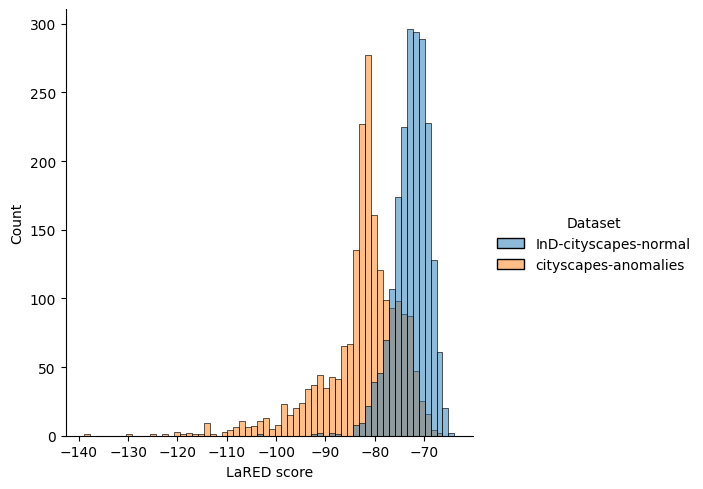

In [34]:
df_h_z_valid_scores = pd.concat([df_score_ind_cs_normal,
                                 df_score_ood_cs_anomal]).reset_index(drop=True)

sns.displot(df_h_z_valid_scores, x="LaRED score", hue="Dataset", kind="hist", fill=True)
plt.show()

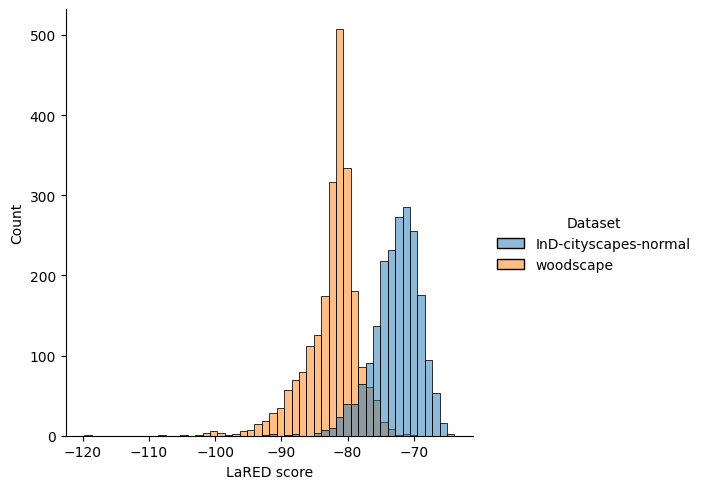

In [35]:
df_h_z_valid_scores = pd.concat([df_score_ind_cs_normal,
                                 df_score_ood_ws]).reset_index(drop=True)

sns.displot(df_h_z_valid_scores, x="LaRED score", hue="Dataset", kind="hist", fill=True)
plt.show()

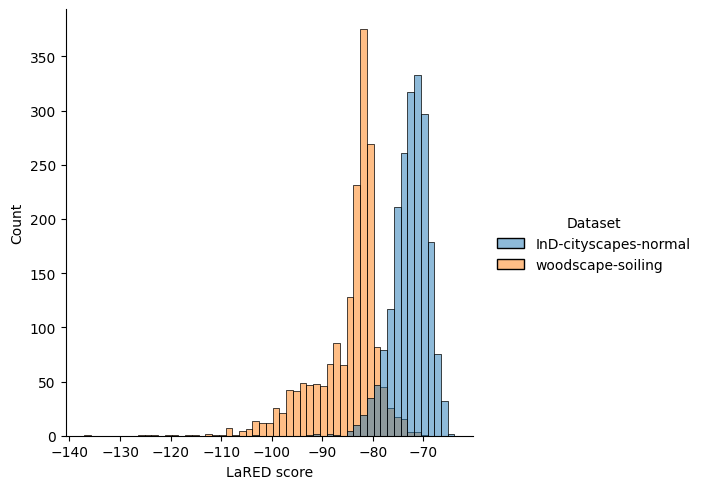

In [36]:
df_h_z_valid_scores = pd.concat([df_score_ind_cs_normal,
                                 df_score_ood_ws_soil]).reset_index(drop=True)

sns.displot(df_h_z_valid_scores, x="LaRED score", hue="Dataset", kind="hist", fill=True)
plt.show()